In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load train features

In [3]:
ur11='https://raw.githubusercontent.com/Edubridge-karthik/EON--DA-8161-and-8162/main/Machine%20Learning%20Alg/train_features.csv'
X_train=pd.read_csv(ur11)
X_train.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,2,0,62.0,10.5000,0,0
1,3,0,8.0,29.1250,5,0
2,3,0,32.0,56.4958,0,0
3,3,1,20.0,9.8250,1,0
4,2,1,28.0,13.0000,0,0


In [6]:
# load y_train data
url2='https://raw.githubusercontent.com/Edubridge-karthik/EON--DA-8161-and-8162/main/Machine%20Learning%20Alg/train_labels.csv'
y_train=pd.read_csv(url2,names=['target'])
y_train.head()

,target
0,1
1,0
2,1
3,0
4,1


In [8]:
# load test data
url3='https://raw.githubusercontent.com/Edubridge-karthik/EON--DA-8161-and-8162/main/Machine%20Learning%20Alg/test_features.csv'
X_test=pd.read_csv(url3)
X_test.head()


,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,3,0,18.000000,20.2125,2,0
1,3,0,29.699118,8.0500,0,0
2,3,0,40.500000,7.7500,0,0
3,3,1,31.000000,20.5250,2,0
4,2,0,32.000000,10.5000,0,0


In [9]:
# load y_test data
url2='https://raw.githubusercontent.com/Edubridge-karthik/EON--DA-8161-and-8162/main/Machine%20Learning%20Alg/test_labels.csv'
y_test=pd.read_csv(url2,names=['target'])
y_test.head()

,target
0,0
1,0
2,0
3,1
4,0


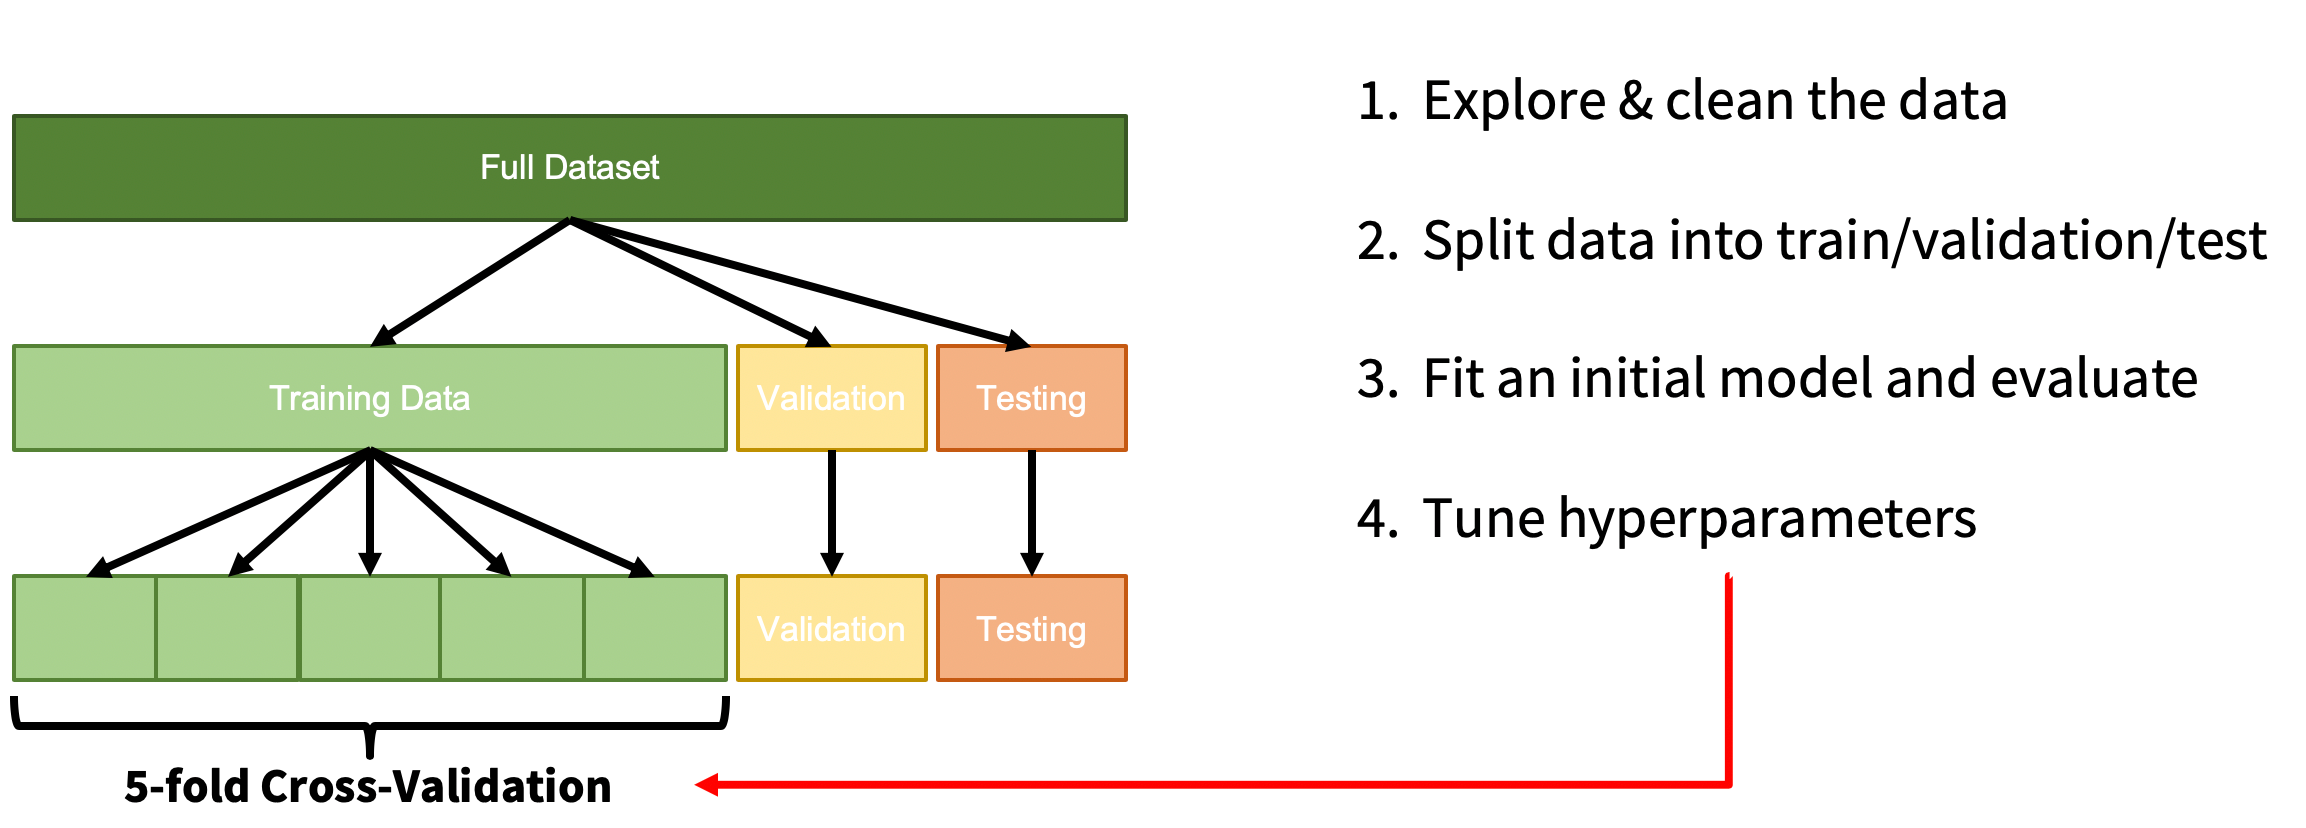

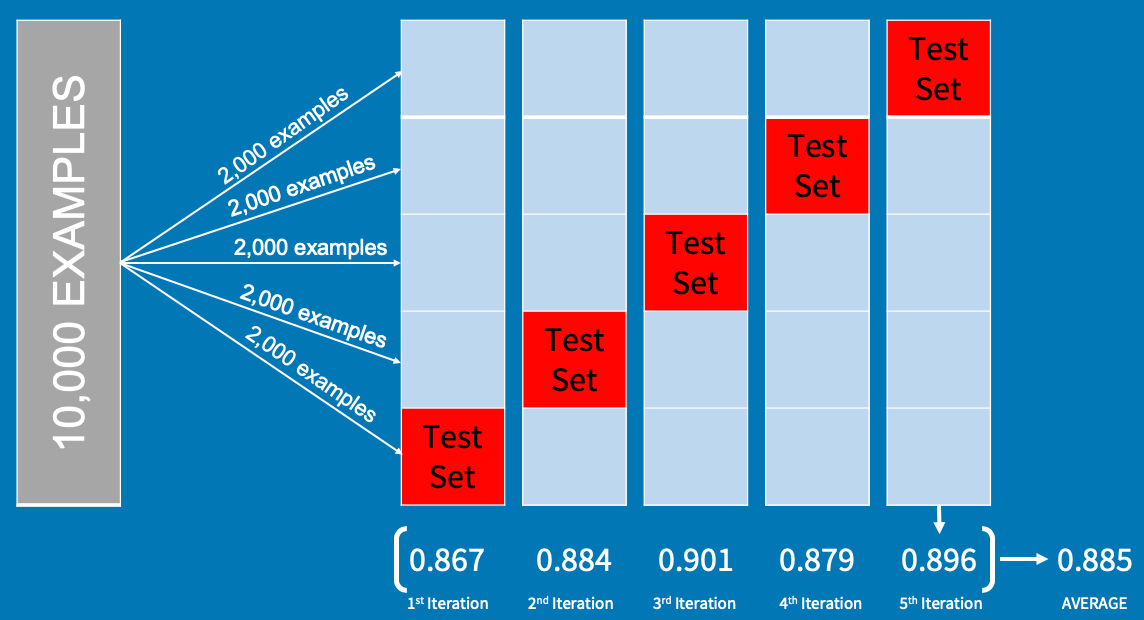

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


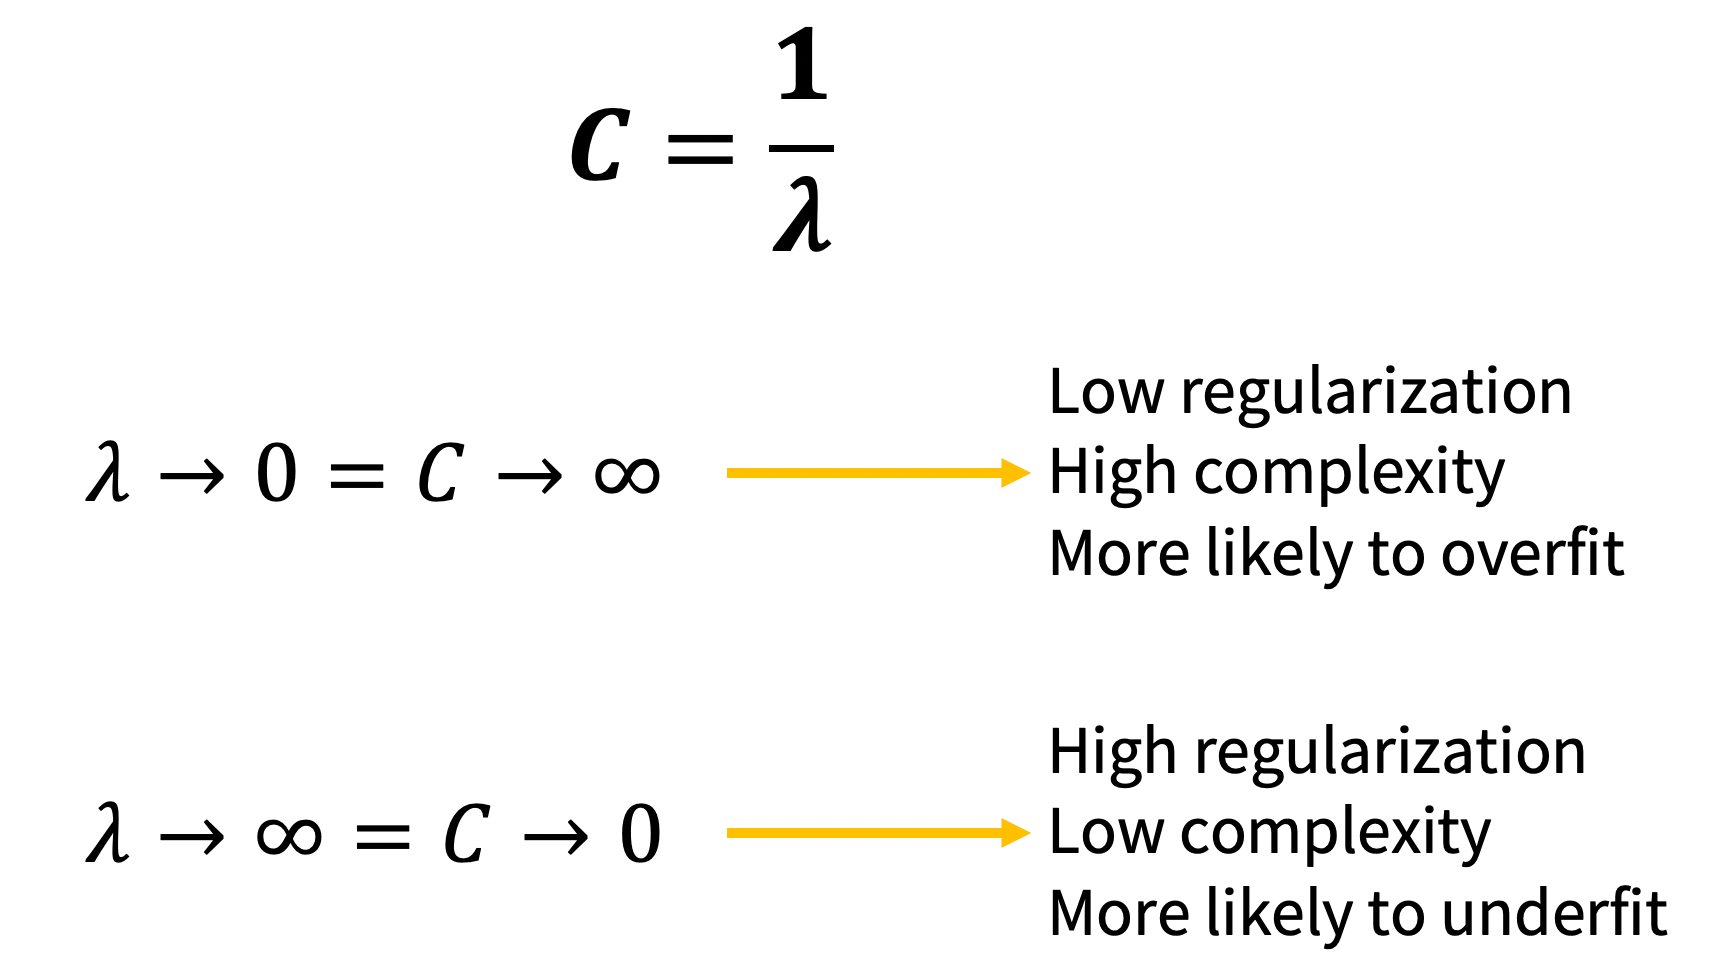

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [14]:
cv.cv_results_

{'mean_fit_time': array([0.01396441, 0.00817738, 0.01129861, 0.01021338, 0.0093751 ,
        0.01137438, 0.01077147]),
 'std_fit_time': array([0.01303263, 0.00074585, 0.00303807, 0.00038392, 0.00101707,
        0.00133912, 0.00039933]),
 'mean_score_time': array([0.00259681, 0.00198941, 0.0017859 , 0.00139055, 0.00199451,
        0.00179529, 0.00327969]),
 'std_score_time': array([4.92202817e-04, 1.05146648e-05, 3.95616005e-04, 4.93308922e-04,
        4.90933902e-07, 3.99584702e-04, 1.46465612e-03]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.69158879, 0.76635514, 0.82242991, 0.85981308, 0.85046729,
        0.85046729, 0.85046729]),
 'split1_test_score': array([0.71028037, 0.73831776, 0.82242991, 0.8317

In [17]:


def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))



In [18]:
print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [19]:
cv.best_estimator_

LogisticRegression(C=1)

In [20]:
best_model=cv.best_estimator_

In [21]:
best_model

LogisticRegression(C=1)